#Import

In [8]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score
import graphviz
import pydot
from sklearn.preprocessing import StandardScaler

#Load DataSet

In [2]:
iris = datasets.load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


#Supervised Learning

Supervised learning is a type of machine learning where the model is trained using labeled data, meaning each input comes with a known output. The algorithm learns to map inputs to their correct outputs by finding patterns in the data, allowing it to make predictions on new, unseen examples. For instance, it can learn to classify emails as spam or not spam, or predict house prices based on features like size and location. In short, supervised learning teaches a model by example so it can generalize and make accurate predictions in the future.

## Linear Regression

Linear regression is a supervised learning algorithm used to model the relationship between one or more input variables (called independent variables) and an output variable (called the dependent variable) by fitting a straight line through the data. The goal is to find the line that best predicts the output based on the inputs

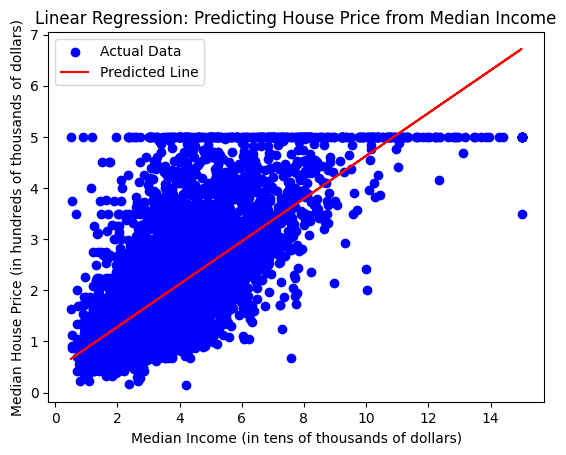

In [9]:
X_boston, y_boston = datasets.fetch_california_housing(return_X_y=True)
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_boston, y_boston, test_size=0.3, random_state=42)
linear_regressor = LinearRegression() # Train the Linear Regression
linear_regressor.fit(X_train_b[:, :1], y_train_b) # Train the Linear Regression
y_pred_b = linear_regressor.predict(X_test_b[:, :1]) # Make predictions

# Visualization
plt.scatter(X_test_b[:, 0], y_test_b, color='blue', label="Actual Data")
plt.plot(X_test_b[:, 0], y_pred_b, color='red', label="Predicted Line")
plt.title("Linear Regression: Predicting House Price from Median Income")
plt.xlabel("Median Income (in tens of thousands of dollars)")
plt.ylabel("Median House Price (in hundreds of thousands of dollars)")
plt.legend()
plt.show()


##Logistic Regression

Logistic regression is a supervised learning algorithm used for classification tasks, meaning it predicts which category or class a data point belongs to. Instead of fitting a straight line like linear regression, it uses a sigmoid (S-shaped) function to output probabilities between 0 and 1.

In [10]:

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

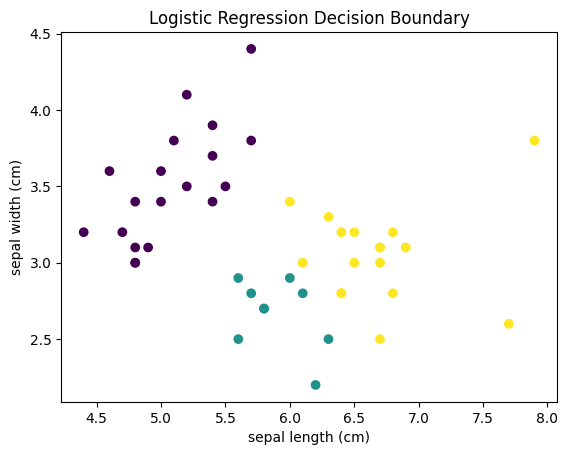

In [11]:


# Train the Logistic Regression model
log_regressor = LogisticRegression(max_iter=200)
log_regressor.fit(X_train[:, :2], y_train)  # using only the first two features

# Make predictions
y_pred = log_regressor.predict(X_test[:, :2])

# Visualization
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='viridis')
plt.title("Logistic Regression Decision Boundary")
plt.xlabel(iris.feature_names[0])  # sepal length
plt.ylabel(iris.feature_names[1])  # sepal width
plt.show()

##Decision Tree

In [12]:
tree = DecisionTreeClassifier() # Train the Decision Tree
tree.fit(X_train, y_train)  # Train the Decision Tree
y_pred = tree.predict(X_test) # Make predictions

# Visualization of decision tree
try:
    dot_data = export_graphviz(tree, out_file=None, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
    graph = graphviz.Source(dot_data)
    graph.render("iris_decision_tree", format="png")
    graph
except Exception as e:
    print("Graphviz rendering skipped:", e)

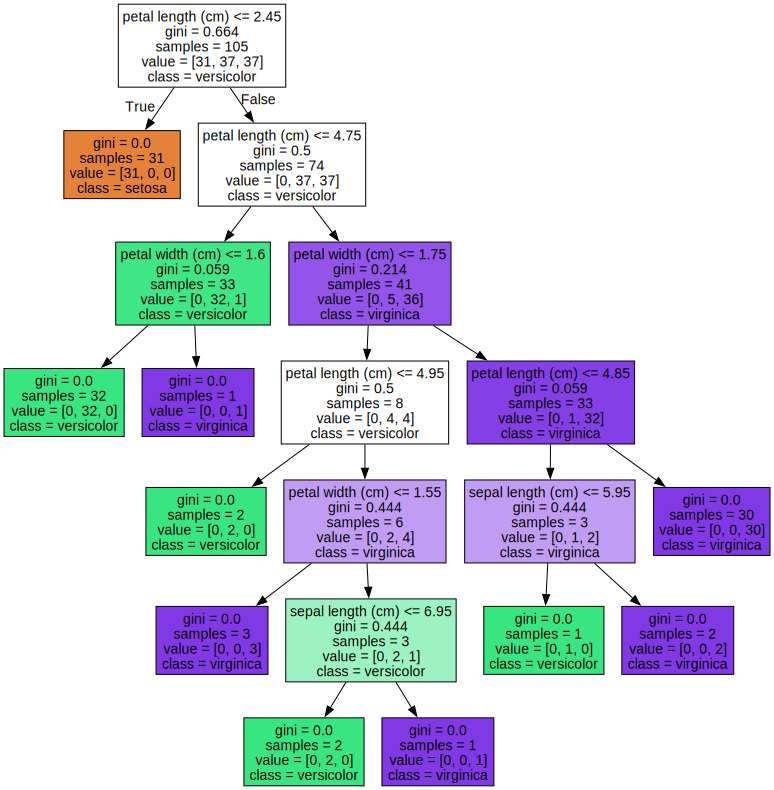

In [13]:
tree = DecisionTreeClassifier() # Train the Decision Tree
tree.fit(X_train, y_train)  # Train the Decision Tree
y_pred = tree.predict(X_test) # Make predictions

# Visualization of decision tree
dot_data = export_graphviz(tree, out_file=None, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
graph = graphviz.Source(dot_data)
graph.render("iris_decision_tree", format="png")
graph

##Random Forest

A Random Forest is an advanced machine learning algorithm that combines many decision trees to make more accurate and stable predictions. It’s called an “ensemble” method because it merges the results of multiple models.

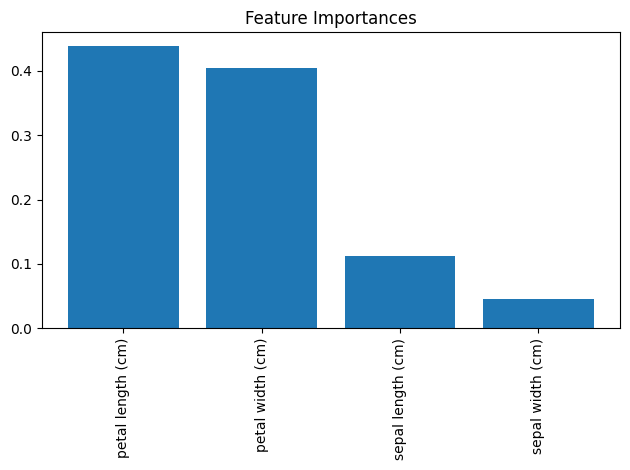

In [14]:
forest = RandomForestClassifier() # Train the Random Forest
forest.fit(X_train, y_train) # Train the Random Forest

# Visualization of feature importance
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), np.array(iris.feature_names)[indices], rotation=90)
plt.tight_layout()
plt.show()

##Supervector Machine

A Support Vector Machine (SVM) is a supervised learning algorithm used for classification and sometimes regression. It works by finding the best boundary (called a hyperplane) that separates data points of different classes in a feature space.
The goal of SVM is to maximize the margin, which is the distance between the hyperplane and the nearest data points from each class (called support vectors). A larger margin usually means better generalization to new data.

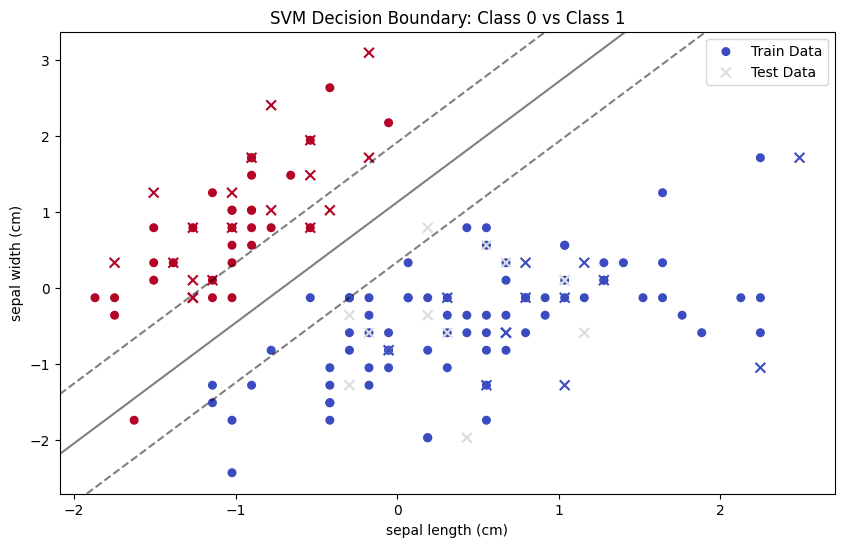

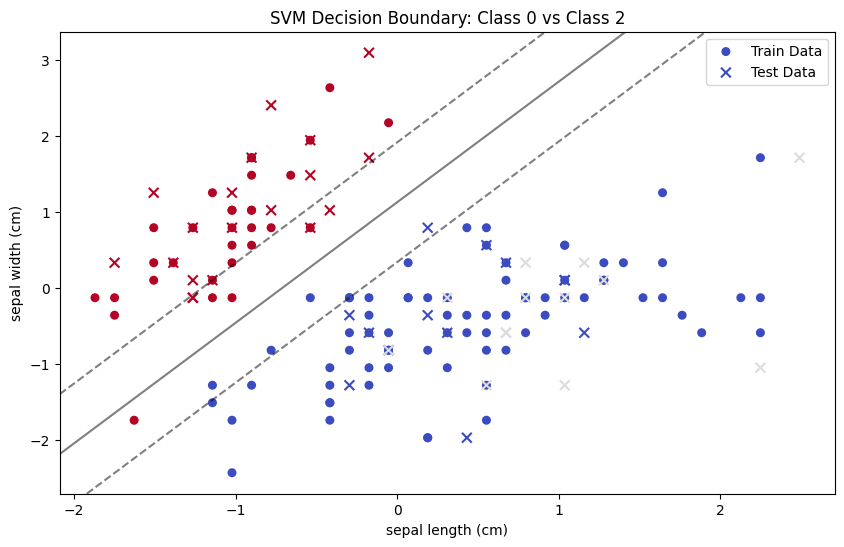

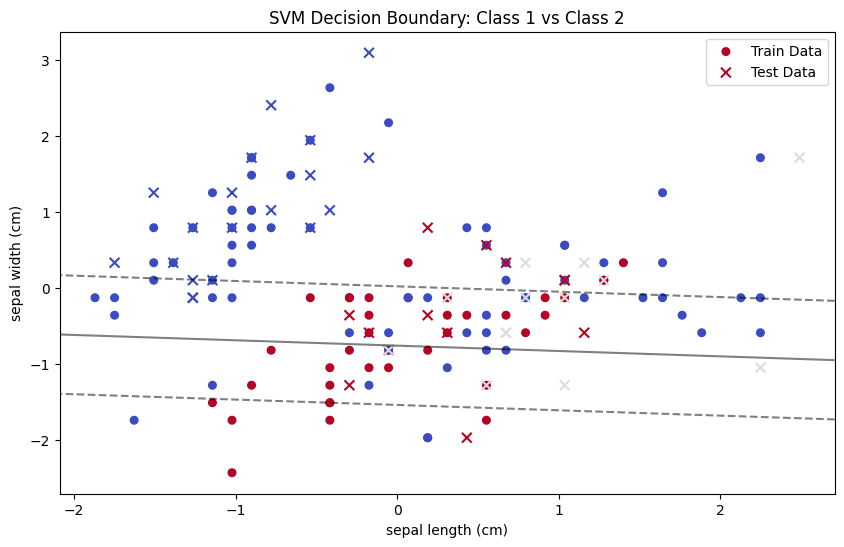

In [15]:

# Load the Iris dataset
iris = datasets.load_iris()
X2 = iris.data[:, :2]  # Use only the first two features (sepal length and sepal width)
Y2 = iris.target

# Standardize features
scaler = StandardScaler()
X2 = scaler.fit_transform(X2)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X2, Y2, test_size=0.3, random_state=42)

# Train the SVM model for each class pair
def plot_iris_svm(X_train, X_test, y_train, y_test, class1, class2):
    # Create a binary target for the two classes
    y_train_binary = np.where(y_train == class1, 1, -1)
    y_test_binary = np.where(y_test == class1, 1, -1)
    y_test_binary[y_test == class2] = 0

    # Train SVM
    svm = SVC(kernel='linear')
    svm.fit(X_train[y_train_binary != 0], y_train_binary[y_train_binary != 0])  # Train with binary classes

    # Plot decision boundary
    plt.figure(figsize=(10, 6))
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train_binary, cmap='coolwarm', s=30, label='Train Data')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test_binary, marker='x', cmap='coolwarm', s=50, label='Test Data')

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))

    # Predict the function value for the whole grid
    Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary and margins
    ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    plt.title(f"SVM Decision Boundary: Class {class1} vs Class {class2}")
    plt.xlabel(iris.feature_names[0])  # Sepal length
    plt.ylabel(iris.feature_names[1])  # Sepal width
    plt.legend()
    plt.show()

# Plot SVM decision boundaries for each pair of classes
classes = np.unique(Y2)
for i in range(len(classes)):
    for j in range(i + 1, len(classes)):
        plot_iris_svm(X_train, X_test, y_train, y_test, classes[i], classes[j])


##  Neural Network (MLP)

A Neural Network, or Multilayer Perceptron (MLP), is a supervised learning algorithm inspired by how the human brain works. It consists of layers of interconnected nodes called neurons — an input layer, one or more hidden layers, and an output layer.
Each neuron takes inputs, multiplies them by weights, adds a bias, and passes the result through an activation function (like ReLU or sigmoid) to introduce non-linearity. The network learns by adjusting these weights using a process called backpropagation, which minimizes the error between predicted and actual outputs.

In [16]:

mlp = MLPClassifier(max_iter=1000) # Train the MLP
mlp.fit(X_train, y_train) # Train the MLP

y_pred_mlp = mlp.predict(X_test) #Make Prediction
print("Accuracy (MLP):", accuracy_score(y_test, y_pred_mlp))

Accuracy (MLP): 0.8


#  Unsupervised Learning

Unsupervised learning is a type of machine learning where the model is trained on unlabeled data — meaning there are no predefined outputs or target values. The goal is for the algorithm to find hidden patterns or structures within the data on its own.


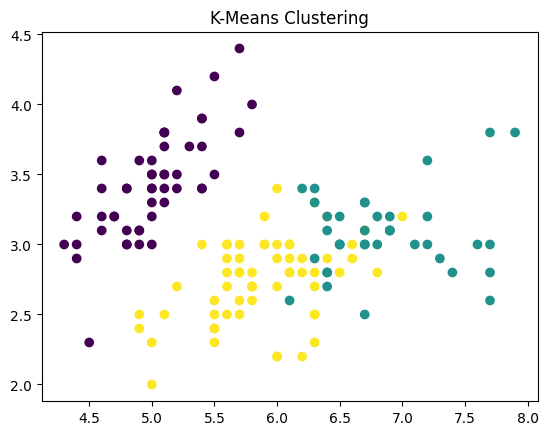

In [17]:
## a) K-Means Clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# Visualization
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title("K-Means Clustering")
plt.show()

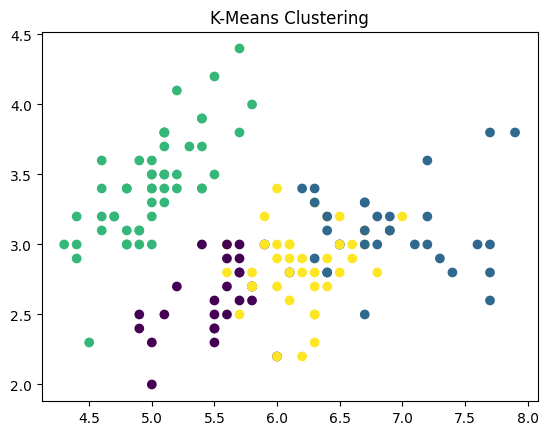

In [18]:
## a) K-Means Clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

# Visualization
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title("K-Means Clustering")
plt.show()

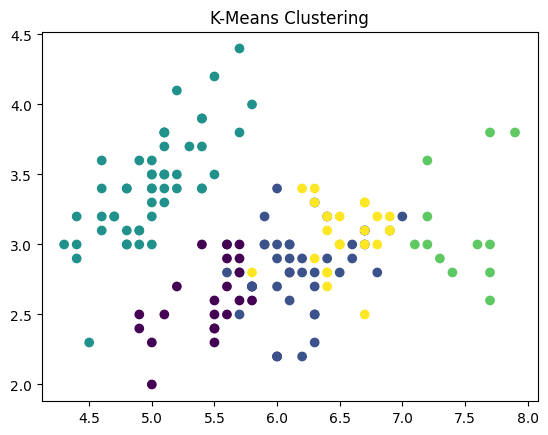

In [19]:
## a) K-Means Clustering
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

# Visualization
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title("K-Means Clustering")
plt.show()

#HomeWork

### Introduction to the Wine Quality Dataset


In this exercise, we will explore the Wine Quality dataset, which contains information about various wine samples and their quality ratings. We will learn how to visualize the data and train a simple machine learning model to classify the quality of the wines based on their features.


## Load the Required Libraries


In the next cell, you will load the necessary libraries. Run the code below to import the libraries we need for our analysis.


In [20]:
# Load the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


##Load the Wine Quality Dataset

##Load the Wine Quality Dataset
Now, we will load the Wine Quality dataset.


In [21]:
# Load the Wine Quality dataset
wine = datasets.load_wine()
X = wine.data  # Features
y = wine.target  # Target variable (wine quality)

# Create a DataFrame for better visualization
wine_df = pd.DataFrame(X, columns=wine.feature_names)
wine_df['target'] = y

# Display the feature names
print("Feature names:", wine.feature_names)
# Display the first few rows of the dataset
wine_df.head()


Feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


##Part1:Visualize the Data

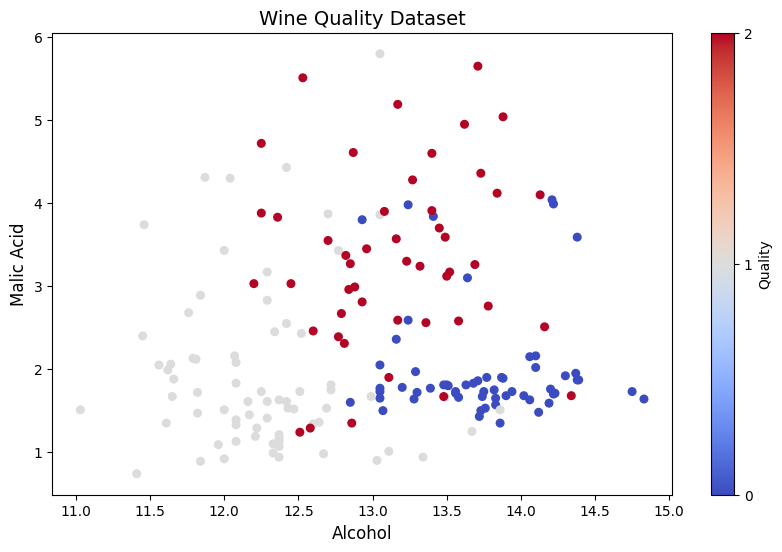

In [22]:
# --- Data Visualization ---
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
plt.scatter(wine_df['alcohol'], wine_df['malic_acid'], 
            c=wine_df['target'], cmap='coolwarm', s=30)

# Titles and labels
plt.title("Wine Quality Dataset", fontsize=14)
plt.xlabel("Alcohol", fontsize=12)
plt.ylabel("Malic Acid", fontsize=12)

# Colorbar for target classes
plt.colorbar(ticks=np.unique(wine_df['target']), label='Quality')

plt.show()


## Standardize the Features


Before training our model, we need to standardize the features. Run the code below to standardize the features.

In [23]:
# Standardize features
scaler = StandardScaler()
X2 = scaler.fit_transform(X)  # Standardize features

In [24]:
# Split the dataset into training and testing sets (using standardized features X2)
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, random_state=42)

In [25]:
# --- Split standardized data into training and testing sets ---
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X2, y, test_size=0.3, random_state=42
)


## Part 3 : create a Decision Tree and a Logistic Regression model to classify the wine quality. We will print the accuracy for each model. The code for SVM will serve as an example, and you should complete the code for Decision Tree and Logistic Regression accordingly.

###SVM

#### Train the SVM Model

In [26]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

####make prediction

In [27]:
y_pred = svm.predict(X_test)

#### Evaluate the Model



Now that we have trained our model, we can evaluate its performance on the test set. Run the code below to make predictions and calculate the accuracy.

In [28]:
# Make predictions and calculate accuracy
accuracy = accuracy_score(y_test , y_pred)
print(f"Accuracy of the SVM model: {accuracy:.2f}")


Accuracy of the SVM model: 0.98


In [29]:
# Train the Decision Tree model
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt.predict(X_test)

# Evaluate the model
acc_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy of the Decision Tree model: {acc_dt:.2f}")

Accuracy of the Decision Tree model: 0.96


Decision Tree Accuracy: 0.96



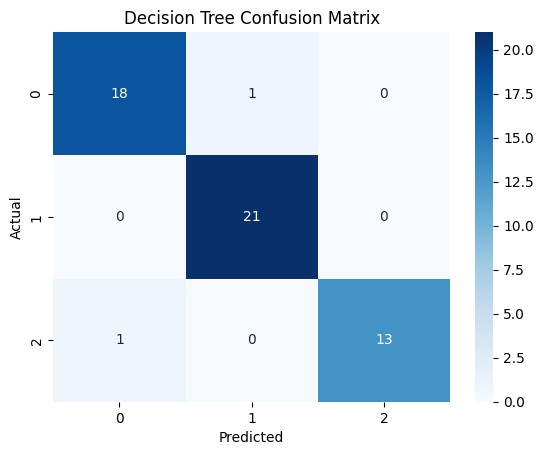

Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        19
           1       0.95      1.00      0.98        21
           2       1.00      0.93      0.96        14

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.96      0.96      0.96        54



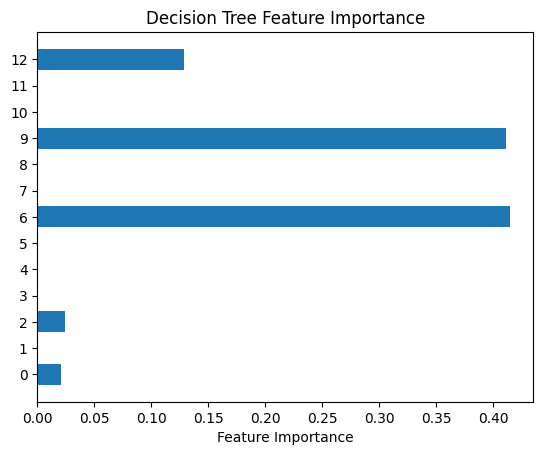

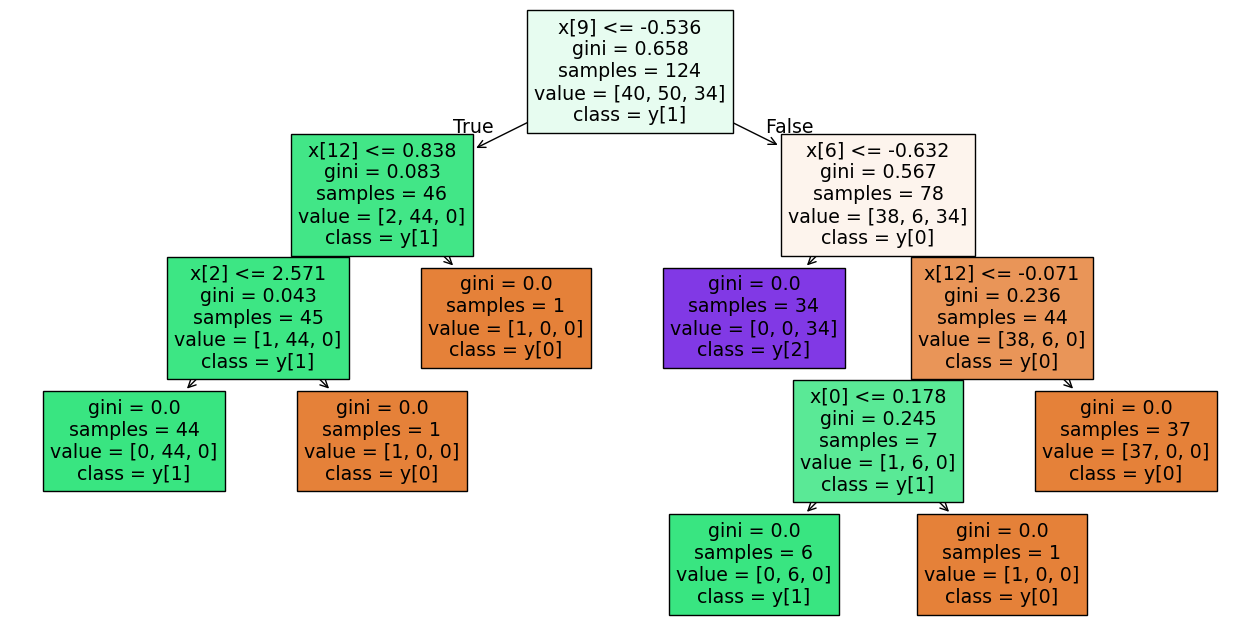

In [31]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

""" Train the Decision Tree model with max_depth tuning """
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train, y_train)

""" Make predictions """
y_pred_dt = dt.predict(X_test)

""" Evaluate the model with detailed metrics """
acc_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {acc_dt:.2f}\n")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred_dt))

""" Visualize Feature Importance """
feature_importances = dt.feature_importances_
plt.barh(range(len(feature_importances)), feature_importances)
plt.yticks(range(len(feature_importances)), X_train.columns if hasattr(X_train, 'columns') else range(len(feature_importances)))
plt.xlabel("Feature Importance")
plt.title("Decision Tree Feature Importance")
plt.show()

""" Optional: Visualize the Tree Structure """
plt.figure(figsize=(16, 8))
plot_tree(dt, filled=True, feature_names=X_train.columns if hasattr(X_train, 'columns') else None, class_names=True)
plt.show()


In [32]:
# Train the Logistic Regression model
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Make predictions
y_pred_lr = logreg.predict(X_test)

# Evaluate the model
acc_lr = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy of the Logistic Regression model: {acc_lr:.2f}")

Accuracy of the Logistic Regression model: 0.98


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Library/Frameworks/Pytho

Logistic Regression (best C=0.1), Accuracy: 1.00


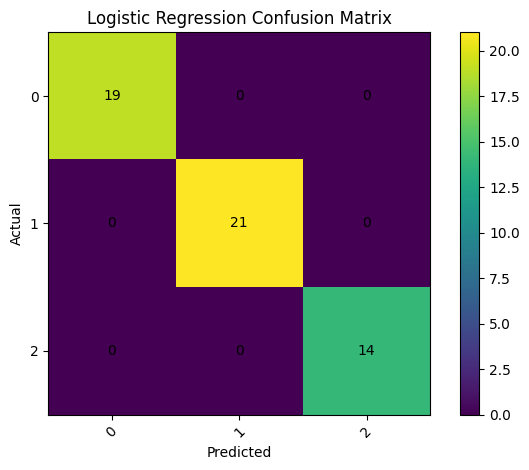

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



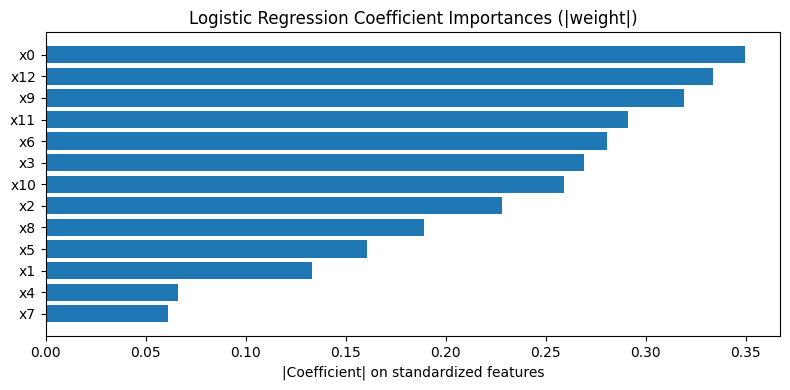

In [33]:
# --- Logistic Regression: 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt

# Pipeline with scaling (important for LR)
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=5000, solver="lbfgs", multi_class="auto", random_state=42))
])

# Simple hyperparameter search (regularization strength)
param_grid = {
    "clf__C": [0.01, 0.1, 1.0, 3.0, 10.0]
}

grid = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1, scoring="accuracy")
grid.fit(X_train, y_train)

logreg = grid.best_estimator_
y_pred_lr = logreg.predict(X_test)
proba = logreg.predict_proba(X_test)

# --- Accuracy
acc_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression (best C={grid.best_params_['clf__C']}), Accuracy: {acc_lr:.2f}")

# --- Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)
plt.figure()
plt.imshow(cm, interpolation='nearest')
plt.title("Logistic Regression Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test), rotation=45)
plt.yticks(tick_marks, np.unique(y_test))
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")
plt.xlabel("Predicted"); plt.ylabel("Actual")
plt.tight_layout(); plt.show()

# --- Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred_lr))

# --- “Feature importance” via standardized coefficients
# If X_train is a DataFrame, use its column names; otherwise use indices
feature_names = (X_train.columns if hasattr(X_train, "columns") 
                 else [f"x{i}" for i in range(X_train.shape[1])])

# Get the scaler learned inside the pipeline to back out standardized coefs
scaler = logreg.named_steps["scaler"]
clf = logreg.named_steps["clf"]

# Coefficients are on standardized features already (because of pipeline)
# Binary: coef_.shape = (1, n_features); Multiclass: (n_classes, n_features)
coefs = clf.coef_
if coefs.shape[0] == 1:
    importances = np.abs(coefs[0])
else:
    # Aggregate across classes (mean absolute weight)
    importances = np.mean(np.abs(coefs), axis=0)

order = np.argsort(importances)
plt.figure(figsize=(8, max(4, len(feature_names)*0.3)))
plt.barh(np.array(feature_names)[order], importances[order])
plt.title("Logistic Regression Coefficient Importances (|weight|)")
plt.xlabel("|Coefficient| on standardized features")
plt.tight_layout(); plt.show()

#